In [173]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Read the CSV files
rb85_data = pd.read_csv('OPT Data - Rubidium 85.csv')
rb87_data = pd.read_csv('OPT Data - Rubidium 87.csv')

rb85_data['Current (mA)'] = 1e2*rb85_data['Voltage (mV)']
rb85_data['Abs Current'] = np.abs(rb85_data['Current (mA)'])
rb85_data['Current Error'] = 1e2*rb85_data['Voltage Error']

rb87_data['Current (mA)'] = 1e2*rb87_data['Voltage (mV)']
rb87_data['Abs Current'] = np.abs(rb87_data['Current (mA)'])
rb87_data['Current Error'] = 1e2*rb87_data['Voltage Error']

Chi squared {85Rb, +} =31493.97480190644
Chi squared {85Rb, -} =270.3743884654675
Chi squared {87Rb, +} =2972.652619638943
Chi squared {87Rb, -} =117.66708803788629
Reduced Chi squared {85Rb, +} =2624.49790015887
Reduced Chi squared {85Rb, -} =22.53119903878896
Reduced Chi squared {87Rb, +} =247.7210516365786
Reduced Chi squared {87Rb, -} =9.805590669823857


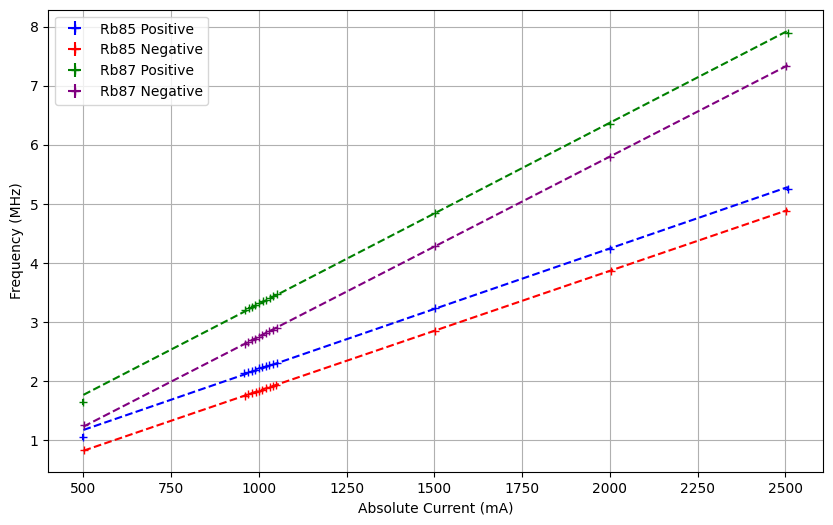

For Rubidium 85 (+):
Slope (m): 0.0020
Intercept (c): 0.1458

For Rubidium 85 (-):
Slope (m): 0.0020
Intercept (c): -0.1965

For Rubidium 87 (+):
Slope (m): 0.003072
Intercept (c): 0.2287

For Rubidium 87 (-):
Slope (m): 0.003048
Intercept (c): -0.2969


In [174]:
# Define a linear fitting function
def linear_fit(x, m, c):
    return m * x + c

# Define a function to calculate chi-squared
def chi_squared(observed, expected, errors):
    return np.sum(((observed - expected) / errors)**2)

def red_chi_squared(observed, expected, error):
    return chi_squared(observed, expected, error) / (len(observed) - 2)

# Separate data by isotope and polarity
rb85_positive = rb85_data[rb85_data['Polarity'] == 'P']
rb85_negative = rb85_data[rb85_data['Polarity'] == 'N']
rb87_positive = rb87_data[rb87_data['Polarity'] == 'P']
rb87_negative = rb87_data[rb87_data['Polarity'] == 'N']

# Define current values for fitting
rb85_values = np.linspace(min(rb85_data['Abs Current']), max(rb85_data['Abs Current']), 1000)
rb87_values = np.linspace(min(rb87_data['Abs Current']), max(rb87_data['Abs Current']), 1000)

# Fit lines
rb85_positive_params, _ = curve_fit(linear_fit, rb85_positive['Abs Current'], rb85_positive['Freq (MHz)'])
rb85_negative_params, _ = curve_fit(linear_fit, rb85_negative['Abs Current'], rb85_negative['Freq (MHz)'],)
rb87_positive_params, _ = curve_fit(linear_fit, rb87_positive['Abs Current'], rb87_positive['Freq (MHz)'],)
rb87_negative_params, _ = curve_fit(linear_fit, rb87_negative['Abs Current'], rb87_negative['Freq (MHz)'], )

# Calculate chi-squared values
chi_rb85_positive = chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
chi_rb85_negative = chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
chi_rb87_positive = chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
chi_rb87_negative = chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Chi squared {85Rb, +} ="+str(chi_rb85_positive))
print("Chi squared {85Rb, -} ="+str(chi_rb85_negative))
print("Chi squared {87Rb, +} ="+str(chi_rb87_positive))
print("Chi squared {87Rb, -} ="+str(chi_rb87_negative))

# Calculate chi-squared values
red_chi_rb85_positive = red_chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
red_chi_rb85_negative = red_chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
red_chi_rb87_positive = red_chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
red_chi_rb87_negative = red_chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Reduced Chi squared {85Rb, +} ="+str(red_chi_rb85_positive))
print("Reduced Chi squared {85Rb, -} ="+str(red_chi_rb85_negative))
print("Reduced Chi squared {87Rb, +} ="+str(red_chi_rb87_positive))
print("Reduced Chi squared {87Rb, -} ="+str(red_chi_rb87_negative))

# Plotting and fitting
plt.figure(figsize=(10, 6))

# Rubidium 85 - Positive Polarity
plt.errorbar(rb85_positive['Abs Current'], rb85_positive['Freq (MHz)'], 
             xerr=rb85_positive['Current Error'], yerr=rb85_positive['Freq Err'],
             fmt='+', label='Rb85 Positive', color='blue')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_positive_params), color='blue', linestyle='--')

# Rubidium 85 - Negative Polarity
plt.errorbar(rb85_negative['Abs Current'], rb85_negative['Freq (MHz)'], 
             xerr=rb85_negative['Current Error'], yerr=rb85_negative['Freq Err'],
             fmt='+', label='Rb85 Negative', color='red')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_negative_params), color='red', linestyle='--')

# Rubidium 87 - Positive Polarity
plt.errorbar(rb87_positive['Abs Current'], rb87_positive['Freq (MHz)'], 
             xerr=rb87_positive['Current Error'], yerr=rb87_positive['Freq Err'],
             fmt='+', label='Rb87 Positive', color='green')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_positive_params), color='green', linestyle='--')

# Rubidium 87 - Negative Polarity
plt.errorbar(rb87_negative['Abs Current'], rb87_negative['Freq (MHz)'], 
             xerr=rb87_negative['Current Error'], yerr=rb87_negative['Freq Err'],
             fmt='+', label='Rb87 Negative', color='purple')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_negative_params), color='purple', linestyle='--')

# Add labels and legend
plt.ylabel('Frequency (MHz)')
plt.xlabel('Absolute Current (mA)')
plt.legend()
plt.grid(True)
#plt.text(2, 9.5, f'Chi-squared (Rb85 Positive): {chi_rb85_positive:.2f}', fontsize=12, color='blue')

# Show the plot
plt.show()

# Print the parameters
print("For Rubidium 85 (+):")
print(f"Slope (m): {rb85_positive_params[0]:.4f}")
print(f"Intercept (c): {rb85_positive_params[1]:.4f}\n")

print("For Rubidium 85 (-):")
print(f"Slope (m): {rb85_positive_params[0]:.4f}")
print(f"Intercept (c): {rb85_negative_params[1]:.4f}\n")

print("For Rubidium 87 (+):")
print(f"Slope (m): {rb87_positive_params[0]:.4}")
print(f"Intercept (c): {rb87_positive_params[1]:.4f}\n")

print("For Rubidium 87 (-):")
print(f"Slope (m): {rb87_negative_params[0]:.4}")
print(f"Intercept (c): {rb87_negative_params[1]:.4f}")

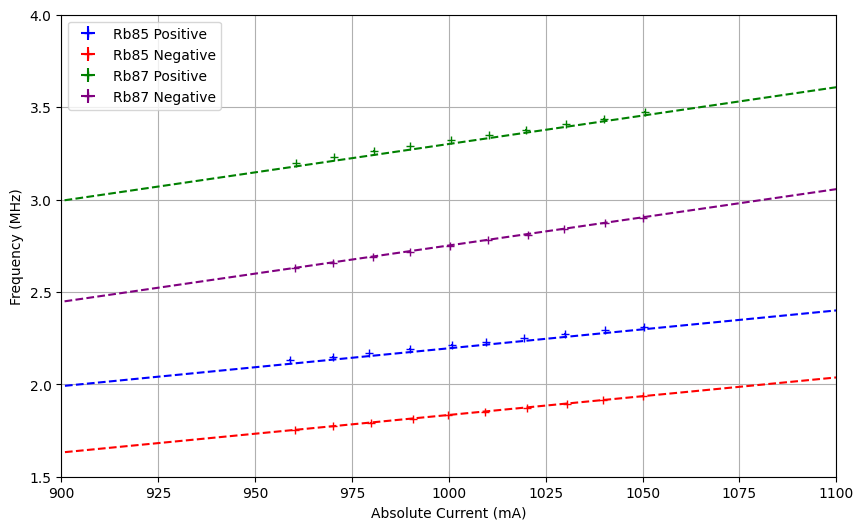

In [175]:
# Plotting and fitting
plt.figure(figsize=(10, 6))

# Rubidium 85 - Positive Polarity
plt.errorbar(rb85_positive['Abs Current'], rb85_positive['Freq (MHz)'], 
             yerr=rb85_positive['Freq Err'], xerr=rb85_positive['Current Error'],
             fmt='+', label='Rb85 Positive', color='blue')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_positive_params), color='blue', linestyle='--')

# Rubidium 85 - Negative Polarity
plt.errorbar(rb85_negative['Abs Current'], rb85_negative['Freq (MHz)'], 
             yerr=rb85_negative['Freq Err'], xerr=rb85_negative['Current Error'],
             fmt='+', label='Rb85 Negative', color='red')
plt.plot(rb85_values, linear_fit(rb85_values, *rb85_negative_params), color='red', linestyle='--')

# Rubidium 87 - Positive Polarity
plt.errorbar(rb87_positive['Abs Current'], rb87_positive['Freq (MHz)'], 
             yerr=rb87_positive['Freq Err'], xerr=rb87_positive['Current Error'],
             fmt='+', label='Rb87 Positive', color='green')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_positive_params), color='green', linestyle='--')

# Rubidium 87 - Negative Polarity
plt.errorbar(rb87_negative['Abs Current'], rb87_negative['Freq (MHz)'], 
             yerr=rb87_negative['Freq Err'], xerr=rb87_negative['Current Error'],
             fmt='+', label='Rb87 Negative', color='purple')
plt.plot(rb87_values, linear_fit(rb87_values, *rb87_negative_params), color='purple', linestyle='--')

# Add labels and legend
plt.ylabel('Frequency (MHz)')
plt.xlabel('Absolute Current (mA)')
plt.legend()
plt.grid(True)
plt.xlim(900,1100)
plt.ylim(1.5,4)

# Show the plot
plt.show()

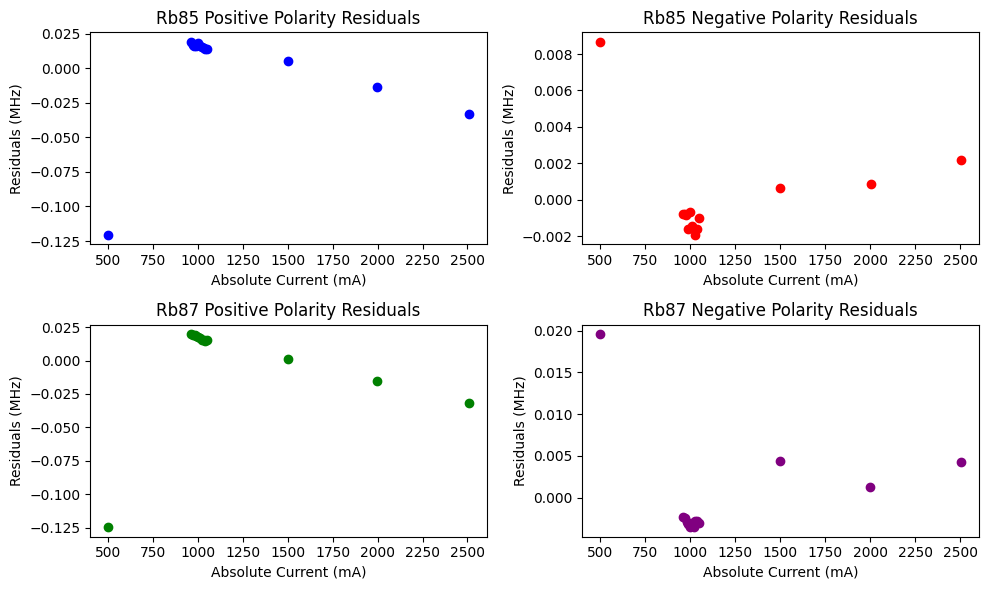

In [176]:
# Calculate residuals for each combination
rb85_positive_res = rb85_positive['Freq (MHz)'] - linear_fit(rb85_positive['Abs Current'], *rb85_positive_params)
rb85_negative_res = rb85_negative['Freq (MHz)'] - linear_fit(rb85_negative['Abs Current'], *rb85_negative_params)
rb87_positive_res = rb87_positive['Freq (MHz)'] - linear_fit(rb87_positive['Abs Current'], *rb87_positive_params)
rb87_negative_res = rb87_negative['Freq (MHz)'] - linear_fit(rb87_negative['Abs Current'], *rb87_negative_params)

# Plotting residuals
plt.figure(figsize=(10, 6))

# Residuals for Rubidium 85 - Positive Polarity
plt.subplot(2, 2, 1)
plt.plot(rb85_positive['Abs Current'], rb85_positive_res, 'o', color='blue')
plt.title('Rb85 Positive Polarity Residuals')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')

# Residuals for Rubidium 85 - Negative Polarity
plt.subplot(2, 2, 2)
plt.plot(rb85_negative['Abs Current'], rb85_negative_res, 'o', color='red')
plt.title('Rb85 Negative Polarity Residuals')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')

# Residuals for Rubidium 87 - Positive Polarity
plt.subplot(2, 2, 3)
plt.plot(rb87_positive['Abs Current'], rb87_positive_res, 'o', color='green')
plt.title('Rb87 Positive Polarity Residuals')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')

# Residuals for Rubidium 87 - Negative Polarity
plt.subplot(2, 2, 4)
plt.plot(rb87_negative['Abs Current'], rb87_negative_res, 'o', color='purple')
plt.title('Rb87 Negative Polarity Residuals')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

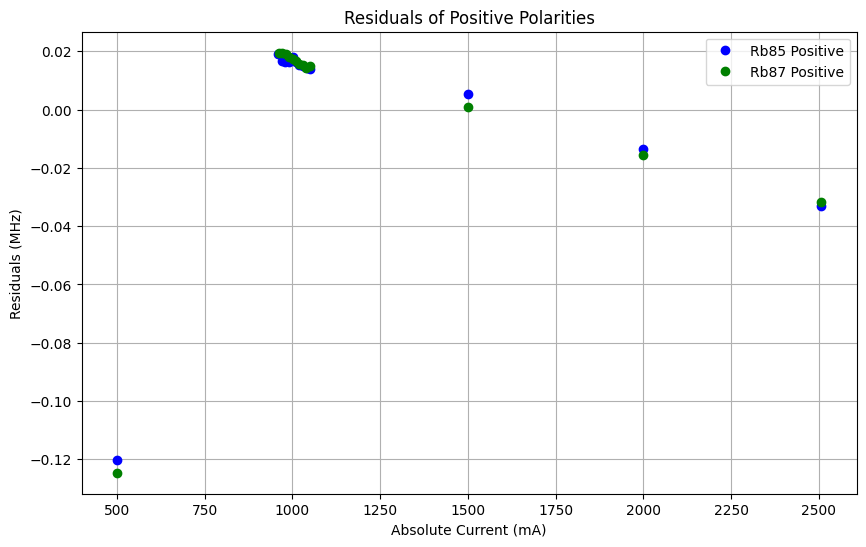

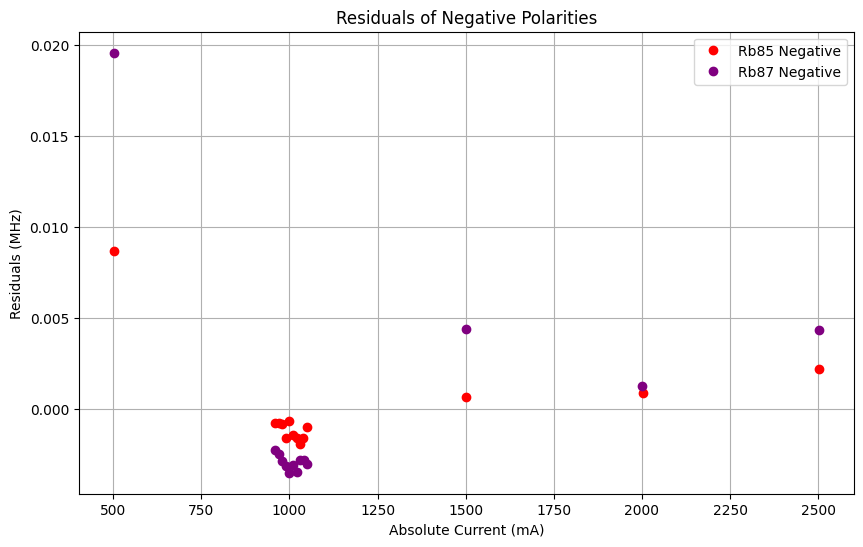

In [177]:
# Combine residuals
all_positive_res = np.concatenate((rb85_positive_res, rb87_positive_res))
all_negative_res = np.concatenate((rb85_negative_res, rb87_negative_res))

# Plotting residuals together
plt.figure(figsize=(10, 6))

# Residuals for Positive Polarity
plt.plot(rb85_positive['Abs Current'], rb85_positive_res, 'o', label='Rb85 Positive', color='blue')
plt.plot(rb87_positive['Abs Current'], rb87_positive_res, 'o', label='Rb87 Positive', color='green')

# Add labels and legend
plt.title('Residuals of Positive Polarities')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Plotting residuals together
plt.figure(figsize=(10, 6))

# Residuals for Negative Polarity
plt.plot(rb85_negative['Abs Current'], rb85_negative_res, 'o', label='Rb85 Negative', color='red')
plt.plot(rb87_negative['Abs Current'], rb87_negative_res, 'o', label='Rb87 Negative', color='purple')

# Add labels and legend
plt.title('Residuals of Negative Polarities')
plt.xlabel('Absolute Current (mA)')
plt.ylabel('Residuals (MHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [178]:
print("Old Chi squared {85Rb, +} ="+str(chi_rb85_positive))
print("Old Chi squared {85Rb, -} ="+str(chi_rb85_negative))
print("Old Chi squared {87Rb, +} ="+str(chi_rb87_positive))
print("Old Chi squared {87Rb, -} ="+str(chi_rb87_negative))

print("Old Red Chi squared {85Rb, +} ="+str(red_chi_rb85_positive))
print("Old Red Chi squared {85Rb, -} ="+str(red_chi_rb85_negative))
print("Old Red Chi squared {87Rb, +} ="+str(red_chi_rb87_positive))
print("Old Red Chi squared {87Rb, -} ="+str(red_chi_rb87_negative))

# Define weights for each data point based on errors
rb85_positive_weights = 1 / (rb85_positive['Freq Err']**2)
rb85_negative_weights = 1 / (rb85_negative['Freq Err']**2)
rb87_positive_weights = 1 / (rb87_positive['Freq Err']**2)
rb87_negative_weights = 1 / (rb87_negative['Freq Err']**2)

# Fit lines using weighted regression
rb85_positive_params = np.polyfit(rb85_data[rb85_data['Polarity'] == 'P']['Abs Current' ], 
                                   rb85_data[rb85_data['Polarity'] == 'P']['Freq (MHz)'], 
                                   1, w=rb85_positive_weights)
rb85_negative_params = np.polyfit(rb85_data[rb85_data['Polarity'] == 'N']['Abs Current'], 
                                   rb85_data[rb85_data['Polarity'] == 'N']['Freq (MHz)'], 
                                   1, w=rb85_negative_weights)
rb87_positive_params = np.polyfit(rb87_data[rb87_data['Polarity'] == 'P']['Abs Current'], 
                                   rb87_data[rb87_data['Polarity'] == 'P']['Freq (MHz)'], 
                                   1, w=rb87_positive_weights)
rb87_negative_params = np.polyfit(rb87_data[rb87_data['Polarity'] == 'N']['Abs Current'], 
                                   rb87_data[rb87_data['Polarity'] == 'N']['Freq (MHz)'], 
                                   1, w=rb87_negative_weights)

Old Chi squared {85Rb, +} =31493.97480190644
Old Chi squared {85Rb, -} =270.3743884654675
Old Chi squared {87Rb, +} =2972.652619638943
Old Chi squared {87Rb, -} =117.66708803788629
Old Red Chi squared {85Rb, +} =2624.49790015887
Old Red Chi squared {85Rb, -} =22.53119903878896
Old Red Chi squared {87Rb, +} =247.7210516365786
Old Red Chi squared {87Rb, -} =9.805590669823857


Chi squared {85Rb, +} =116.51692166754509
Chi squared {85Rb, -} =158.86336608603983
Chi squared {87Rb, +} =43.754214262370326
Chi squared {87Rb, -} =47.19345952193149
Reduced Chi squared {85Rb, +} =9.709743472295424
Reduced Chi squared {85Rb, -} =13.23861384050332
Reduced Chi squared {87Rb, +} =3.646184521864194
Reduced Chi squared {87Rb, -} =3.9327882934942906


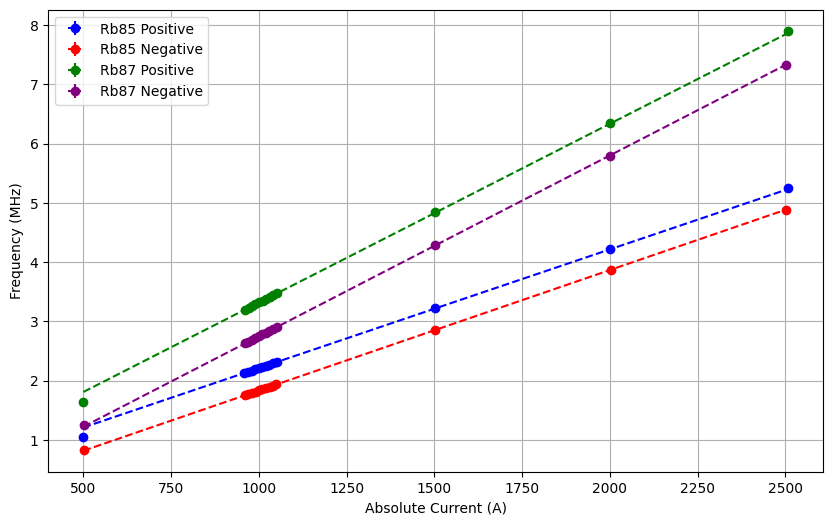

In [179]:
# Calculate the fitted lines
rb85_positive_fit = np.polyval(rb85_positive_params, rb85_values)
rb85_negative_fit = np.polyval(rb85_negative_params, rb85_values)
rb87_positive_fit = np.polyval(rb87_positive_params, rb87_values)
rb87_negative_fit = np.polyval(rb87_negative_params, rb87_values)

# Calculate chi-squared values
chi_rb85_positive = chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
chi_rb85_negative = chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
chi_rb87_positive = chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
chi_rb87_negative = chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Chi squared {85Rb, +} ="+str(chi_rb85_positive))
print("Chi squared {85Rb, -} ="+str(chi_rb85_negative))
print("Chi squared {87Rb, +} ="+str(chi_rb87_positive))
print("Chi squared {87Rb, -} ="+str(chi_rb87_negative))

# Calculate chi-squared values
red_chi_rb85_positive = red_chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
red_chi_rb85_negative = red_chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
red_chi_rb87_positive = red_chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
red_chi_rb87_negative = red_chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Reduced Chi squared {85Rb, +} ="+str(red_chi_rb85_positive))
print("Reduced Chi squared {85Rb, -} ="+str(red_chi_rb85_negative))
print("Reduced Chi squared {87Rb, +} ="+str(red_chi_rb87_positive))
print("Reduced Chi squared {87Rb, -} ="+str(red_chi_rb87_negative))

# Plotting the data points and fitted lines
plt.figure(figsize=(10, 6))

# Rubidium 85 - Positive Polarity
plt.errorbar(rb85_data[rb85_data['Polarity'] == 'P']['Abs Current'], 
             rb85_data[rb85_data['Polarity'] == 'P']['Freq (MHz)'], 
             xerr=rb85_data[rb85_data['Polarity'] == 'P']['Current Error'], 
             yerr=rb85_data[rb85_data['Polarity'] == 'P']['Freq Err'],
             fmt='o', label='Rb85 Positive', color='blue')
plt.plot(rb85_values, rb85_positive_fit, color='blue', linestyle='--')

# Rubidium 85 - Negative Polarity
plt.errorbar(rb85_data[rb85_data['Polarity'] == 'N']['Abs Current'], 
             rb85_data[rb85_data['Polarity'] == 'N']['Freq (MHz)'], 
             xerr=rb85_data[rb85_data['Polarity'] == 'N']['Current Error'], 
             yerr=rb85_data[rb85_data['Polarity'] == 'N']['Freq Err'],
             fmt='o', label='Rb85 Negative', color='red')
plt.plot(rb85_values, rb85_negative_fit, color='red', linestyle='--')

# Rubidium 87 - Positive Polarity
plt.errorbar(rb87_data[rb87_data['Polarity'] == 'P']['Abs Current'], 
             rb87_data[rb87_data['Polarity'] == 'P']['Freq (MHz)'], 
             xerr=rb87_data[rb87_data['Polarity'] == 'P']['Current Error'], 
             yerr=rb87_data[rb87_data['Polarity'] == 'P']['Freq Err'],
             fmt='o', label='Rb87 Positive', color='green')
plt.plot(rb87_values, rb87_positive_fit, color='green', linestyle='--')

# Rubidium 87 - Negative Polarity
plt.errorbar(rb87_data[rb87_data['Polarity'] == 'N']['Abs Current'], 
             rb87_data[rb87_data['Polarity'] == 'N']['Freq (MHz)'], 
             xerr=rb87_data[rb87_data['Polarity'] == 'N']['Current Error'], 
             yerr=rb87_data[rb87_data['Polarity'] == 'N']['Freq Err'],
             fmt='o', label='Rb87 Negative', color='purple')
plt.plot(rb87_values, rb87_negative_fit, color='purple', linestyle='--')

# Add labels and legend
plt.xlabel('Absolute Current (A)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/ipykernel_76998/3297192251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb85_positive['Freq Err'] = rb85_positive['Freq Err']*3.2
/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/ipykernel_76998/3297192251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb85_negative['Freq Err'] = rb85_negative['Freq Err']*3.75
/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/ipykernel_76998/3297192251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

Chi squared {85Rb, +} =11.378605631597821
Chi squared {85Rb, -} =11.29695047722889
Chi squared {87Rb, +} =10.938553565592581
Chi squared {87Rb, -} =11.798364880482872
Reduced Chi squared {85Rb, +} =0.9482171359664852
Reduced Chi squared {85Rb, -} =0.9414125397690741
Reduced Chi squared {87Rb, +} =0.9115461304660485
Reduced Chi squared {87Rb, -} =0.9831970733735726


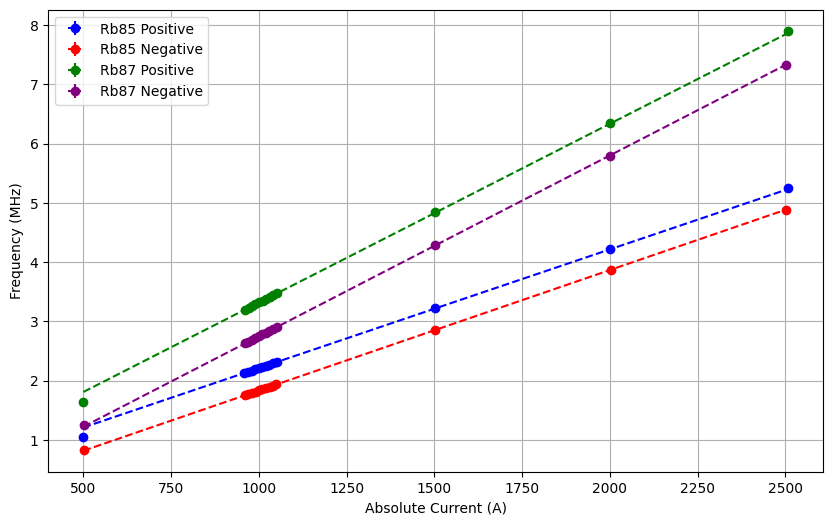

In [180]:
rb85_positive['Freq Err'] = rb85_positive['Freq Err']*3.2
rb85_negative['Freq Err'] = rb85_negative['Freq Err']*3.75
rb87_positive['Freq Err'] = rb87_positive['Freq Err']*2
rb87_negative['Freq Err'] = rb87_negative['Freq Err']*2

# Define weights for each data point based on errors
rb85_positive_weights = 1 / (rb85_positive['Freq Err']**2)
rb85_negative_weights = 1 / (rb85_negative['Freq Err']**2)
rb87_positive_weights = 1 / (rb87_positive['Freq Err']**2)
rb87_negative_weights = 1 / (rb87_negative['Freq Err']**2)

# Fit lines using weighted regression
rb85_positive_params = np.polyfit(rb85_data[rb85_data['Polarity'] == 'P']['Abs Current' ], 
                                   rb85_data[rb85_data['Polarity'] == 'P']['Freq (MHz)'], 
                                   1, w=rb85_positive_weights)
rb85_negative_params = np.polyfit(rb85_data[rb85_data['Polarity'] == 'N']['Abs Current'], 
                                   rb85_data[rb85_data['Polarity'] == 'N']['Freq (MHz)'], 
                                   1, w=rb85_negative_weights)
rb87_positive_params = np.polyfit(rb87_data[rb87_data['Polarity'] == 'P']['Abs Current'], 
                                   rb87_data[rb87_data['Polarity'] == 'P']['Freq (MHz)'], 
                                   1, w=rb87_positive_weights)
rb87_negative_params = np.polyfit(rb87_data[rb87_data['Polarity'] == 'N']['Abs Current'], 
                                   rb87_data[rb87_data['Polarity'] == 'N']['Freq (MHz)'], 
                                   1, w=rb87_negative_weights)

# Calculate the fitted lines
rb85_positive_fit = np.polyval(rb85_positive_params, rb85_values)
rb85_negative_fit = np.polyval(rb85_negative_params, rb85_values)
rb87_positive_fit = np.polyval(rb87_positive_params, rb87_values)
rb87_negative_fit = np.polyval(rb87_negative_params, rb87_values)

# Calculate chi-squared values
chi_rb85_positive = chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
chi_rb85_negative = chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
chi_rb87_positive = chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
chi_rb87_negative = chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Chi squared {85Rb, +} ="+str(chi_rb85_positive))
print("Chi squared {85Rb, -} ="+str(chi_rb85_negative))
print("Chi squared {87Rb, +} ="+str(chi_rb87_positive))
print("Chi squared {87Rb, -} ="+str(chi_rb87_negative))

# Calculate chi-squared values
red_chi_rb85_positive = red_chi_squared(rb85_positive['Freq (MHz)'], linear_fit(rb85_positive['Abs Current'], *rb85_positive_params), rb85_positive['Freq Err'])
red_chi_rb85_negative = red_chi_squared(rb85_negative['Freq (MHz)'], linear_fit(rb85_negative['Abs Current'], *rb85_negative_params), rb85_negative['Freq Err'])
red_chi_rb87_positive = red_chi_squared(rb87_positive['Freq (MHz)'], linear_fit(rb87_positive['Abs Current'], *rb87_positive_params), rb87_positive['Freq Err'])
red_chi_rb87_negative = red_chi_squared(rb87_negative['Freq (MHz)'], linear_fit(rb87_negative['Abs Current'], *rb87_negative_params), rb87_negative['Freq Err'])

print("Reduced Chi squared {85Rb, +} ="+str(red_chi_rb85_positive))
print("Reduced Chi squared {85Rb, -} ="+str(red_chi_rb85_negative))
print("Reduced Chi squared {87Rb, +} ="+str(red_chi_rb87_positive))
print("Reduced Chi squared {87Rb, -} ="+str(red_chi_rb87_negative))

# Plotting the data points and fitted lines
plt.figure(figsize=(10, 6))

# Rubidium 85 - Positive Polarity
plt.errorbar(rb85_data[rb85_data['Polarity'] == 'P']['Abs Current'], 
             rb85_data[rb85_data['Polarity'] == 'P']['Freq (MHz)'], 
             xerr=rb85_data[rb85_data['Polarity'] == 'P']['Current Error'], 
             yerr=rb85_data[rb85_data['Polarity'] == 'P']['Freq Err'],
             fmt='o', label='Rb85 Positive', color='blue')
plt.plot(rb85_values, rb85_positive_fit, color='blue', linestyle='--')

# Rubidium 85 - Negative Polarity
plt.errorbar(rb85_data[rb85_data['Polarity'] == 'N']['Abs Current'], 
             rb85_data[rb85_data['Polarity'] == 'N']['Freq (MHz)'], 
             xerr=rb85_data[rb85_data['Polarity'] == 'N']['Current Error'], 
             yerr=rb85_data[rb85_data['Polarity'] == 'N']['Freq Err'],
             fmt='o', label='Rb85 Negative', color='red')
plt.plot(rb85_values, rb85_negative_fit, color='red', linestyle='--')

# Rubidium 87 - Positive Polarity
plt.errorbar(rb87_data[rb87_data['Polarity'] == 'P']['Abs Current'], 
             rb87_data[rb87_data['Polarity'] == 'P']['Freq (MHz)'], 
             xerr=rb87_data[rb87_data['Polarity'] == 'P']['Current Error'], 
             yerr=rb87_data[rb87_data['Polarity'] == 'P']['Freq Err'],
             fmt='o', label='Rb87 Positive', color='green')
plt.plot(rb87_values, rb87_positive_fit, color='green', linestyle='--')

# Rubidium 87 - Negative Polarity
plt.errorbar(rb87_data[rb87_data['Polarity'] == 'N']['Abs Current'], 
             rb87_data[rb87_data['Polarity'] == 'N']['Freq (MHz)'], 
             xerr=rb87_data[rb87_data['Polarity'] == 'N']['Current Error'], 
             yerr=rb87_data[rb87_data['Polarity'] == 'N']['Freq Err'],
             fmt='o', label='Rb87 Negative', color='purple')
plt.plot(rb87_values, rb87_negative_fit, color='purple', linestyle='--')

# Add labels and legend
plt.xlabel('Absolute Current (A)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

We expect Zeeman splitting according to:

$\nu = B \times 2.7999/(2I+1)$

for $I^{85}=5/2$, $I^{87}=3/2$ and $B = 0.9 \times 10^{-2} \times N \times i / A$
where $i$ is the applied current, $N$ is the number of loops, and $A$ is the area of the Helmholtz coil.

In [181]:
r = 27.5*1e-2 #radius of coil in meters (27.5 cm)
A = np.pi * r ** 2
N = 135
k = 0.9e-2

sigr = 1e-3
sigN = 1
sigA = 2 * np.pi * r * sigr

rb85_data['B-field'] = N * k / A * rb85_data['Current (mA)'] * 1e-3 #mA to Gauss?
rb85_data['B-field Error'] = abs(rb85_data['B-field']) * np.sqrt( (sigN/N) ** 2 + (sigA/A) ** 2 + (rb85_data['Current Error']/rb85_data['Current (mA)']) ** 2)

rb87_data['B-field'] = N * k / A * rb87_data['Current (mA)'] * 1e-3
rb87_data['B-field Error'] = abs(rb87_data['B-field']) * np.sqrt( (sigN/N) ** 2 + (sigA/A) ** 2 + (rb87_data['Current Error']/rb87_data['Current (mA)']) ** 2)

rb85_data['Zeeman'] = rb85_data['B-field'] * 2.7999 / (2 * 5/2 + 1)
rb85_data['Zeeman Error'] = abs(rb85_data['Zeeman']) * np.sqrt( (rb85_data['B-field Error']/rb85_data['B-field']) ** 2 + (rb85_data['Current Error']/rb85_data['Current (mA)']) ** 2)

rb87_data['Zeeman'] = rb87_data['B-field'] * 2.7999 / (2 * 3/2 + 1)
rb87_data['Zeeman Error'] = abs(rb87_data['Zeeman']) * np.sqrt( (rb87_data['B-field Error']/rb87_data['B-field']) ** 2 + (rb87_data['Current Error']/rb87_data['Current (mA)']) ** 2)
